In [1]:
print('Hello')

Hello


In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [26]:
Y_train.shape

(60000, 10)

In [27]:
X_test.shape

(10000, 1, 28, 28)

In [0]:
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [0]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)


In [0]:
model = Sequential()
model.add(Convolution2D(32, (4, 4), activation ='relu', input_shape=(1,28,28),data_format='channels_first'))
#model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [28]:
history = model.fit(X_train, Y_train,batch_size=32, epochs=2, verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 21s 350us/step - loss: 0.0460 - acc: 0.9849 - val_loss: 0.0472 - val_acc: 0.9864
Epoch 2/2
28544/60000 [=============>................] - ETA: 9s - loss: 0.0330 - acc: 0.9897

60000/60000 [==============================] - 20s 338us/step - loss: 0.0351 - acc: 0.9888 - val_loss: 0.0441 - val_acc: 0.9856


In [35]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(history.history.keys())
print(score)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[0.044109188872447705, 0.9856]


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


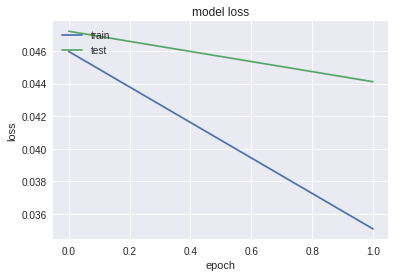

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

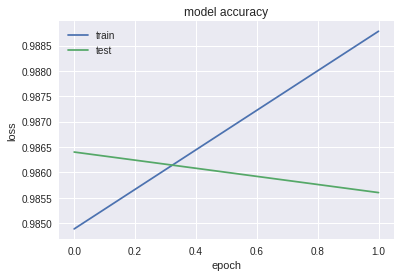

In [34]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()